## Importing Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [3]:
from tqdm.notebook import tqdm

In [4]:
!pip install jovian --upgrade --quiet

In [5]:
project_name = 'course-project-plant-disease-classification'

In [6]:
data ='C:\\Users\\divya\\Desktop\\Divya\\PROJECT\\Plant_AI-master\\DATASET'
os.listdir(data)

['New Plant Diseases Dataset(Augmented)', 'test']

In [7]:
os.listdir('C:\\Users\\divya\\Desktop\\Divya\\PROJECT\\Plant_AI-master\\DATASET\\New Plant Diseases Dataset(Augmented)')

['train', 'valid']

In [8]:
os.listdir('C:\\Users\\divya\\Desktop\\Divya\\PROJECT\\Plant_AI-master\\DATASET\\New Plant Diseases Dataset(Augmented)\\train')

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

## Number of unique plants

In [9]:
unique_plants = []
cl = os.listdir('C:\\Users\\divya\\Desktop\\Divya\\PROJECT\\Plant_AI-master\\DATASET\\New Plant Diseases Dataset(Augmented)\\train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  1
Unique Plants:  ['Tomato']


## Loading Training and Test Dataset as Tensor

In [10]:
transform = transforms.Compose(
    [transforms.Resize(size = 128),
     transforms.ToTensor()])

In [11]:
dataset = ImageFolder('C:\\Users\\divya\\Desktop\\Divya\\PROJECT\\Plant_AI-master\\DATASET\\New Plant Diseases Dataset(Augmented)\\train',transform=transform)
test_ds = ImageFolder('C:\\Users\\divya\\Desktop\\Divya\\PROJECT\\Plant_AI-master\\DATASET\\New Plant Diseases Dataset(Augmented)\\valid',transform=transform)

In [12]:
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  18345
Number of testing images:  4585


## Number of classes

In [13]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  10
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


## Visualising a single image

In [14]:
image, label  = dataset[0]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 128, 128])
Image Label:  0
Image Label:  Tomato___Bacterial_spot
tensor([[[0.5922, 0.6039, 0.6078,  ..., 0.6157, 0.6196, 0.6196],
         [0.6039, 0.6000, 0.6000,  ..., 0.6039, 0.6118, 0.6118],
         [0.6000, 0.5843, 0.5843,  ..., 0.6118, 0.6078, 0.5961],
         ...,
         [0.4627, 0.4588, 0.4627,  ..., 0.4588, 0.4588, 0.4353],
         [0.4627, 0.4588, 0.4549,  ..., 0.4549, 0.4627, 0.4510],
         [0.4667, 0.4667, 0.4549,  ..., 0.4627, 0.4706, 0.4667]],

        [[0.5686, 0.5804, 0.5843,  ..., 0.5922, 0.5961, 0.5961],
         [0.5804, 0.5765, 0.5765,  ..., 0.5804, 0.5882, 0.5882],
         [0.5765, 0.5608, 0.5608,  ..., 0.5882, 0.5843, 0.5725],
         ...,
         [0.4235, 0.4196, 0.4235,  ..., 0.4353, 0.4353, 0.4118],
         [0.4235, 0.4196, 0.4157,  ..., 0.4314, 0.4392, 0.4275],
         [0.4275, 0.4275, 0.4157,  ..., 0.4392, 0.4471, 0.4431]],

        [[0.5686, 0.5804, 0.5843,  ..., 0.6000, 0.6039, 0.6039],
         [0.5804, 0.5765, 0.57

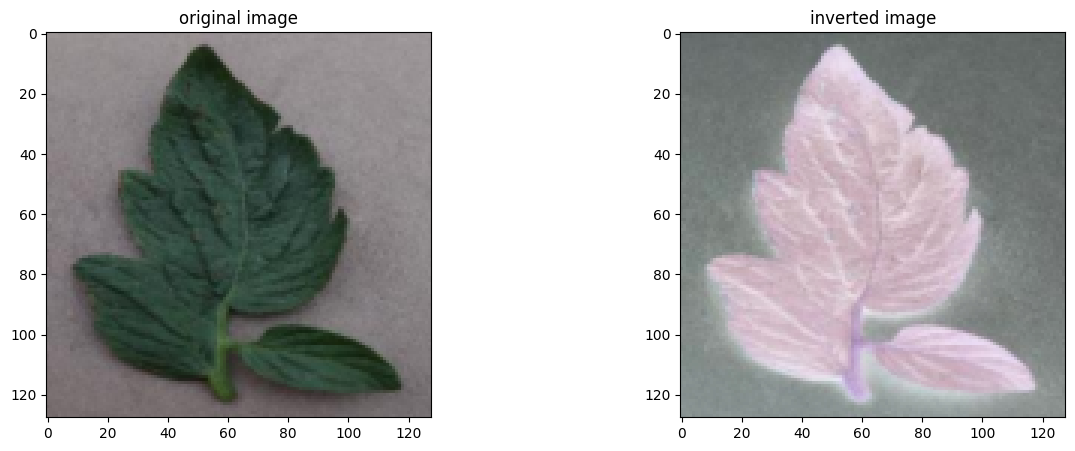

In [15]:
image, label  = dataset[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image.permute(1,2,0))
ax1.set_title("original image")
ax2.imshow(1-image.permute(1,2,0))
ax2.set_title("inverted image")
plt.show()

## Validation Dataset and Dataloader

In [16]:
random_seed = 42
torch.manual_seed(random_seed)

In [17]:
validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [18]:
batch_size = 32
train_loader = DataLoader(train_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)

## Visualising a Batch of images

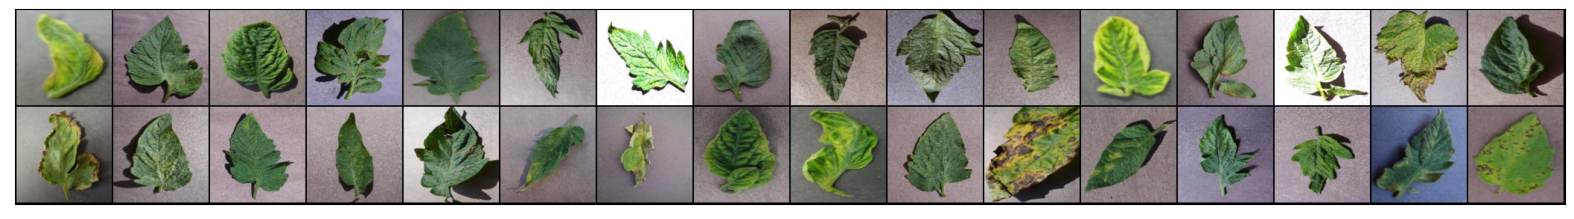

In [19]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

## Building The Model

### Building a Base Image Classification Model

In [20]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() /len(preds))

class ImageClassificationBase(nn.Module):
    
  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_loss = [out['val_loss'] for out in outputs]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [out['val_acc'] for out in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'], result['val_loss'], result['val_acc']))

### Buiding a  CNN model 

In [21]:
class Plant_Disease_Model(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),  #pass the input to the conv2d to apply filter
        nn.ReLU(), #rectified linear activation unit (negative value convert into zero)
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1), 
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 64*64*64  (extract the edge and smooth,sharp)

        nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 128*32*32

        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 256*16*16
        
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 512*8*8
        
        nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(512,1024,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 1024*4*4
        nn.AdaptiveAvgPool2d(1),
        
        nn.Flatten(),   # to convert single long feature vector
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,38)
        )
    z=self.network.summary()
    print(z)

  def forward(self,xb):
    out = self.network(xb)
    print(out.summary())
    return out,out.summary()

  def f(self,xb):
    out = self.network(xb)
    return out.summary()
  


### Building a VGG16 model using Transfer Learning

In [22]:
class Plant_Disease_Model1(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.vgg16(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a resnet34 model using Transfer Learning

In [23]:
class Plant_Disease_Model2(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.resnet34(pretrained=True)
    num_ftrs = self.network.fc.in_features
    self.network.fc = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

## Training and Evaluation

In [24]:
@torch.no_grad()        #disable gradient classification
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [25]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    model.train()
    train_losses = []
    for batch in tqdm(train_loader):
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

## Using GPU

In [26]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [27]:
device = get_default_device()
device

device(type='cpu')

In [28]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [29]:
model = to_device(Plant_Disease_Model2(), device)

c:\Users\divya\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
model

Plant_Disease_Model2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

## Training the model

In [31]:
evaluate(model,val_loader)

{'val_loss': 3.7451562881469727, 'val_acc': 0.025981104001402855}

In [32]:
history = fit(5, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)

  0%|          | 0/402 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.5557, val_loss: 0.3650, val_acc: 0.8728


  0%|          | 0/402 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.2253, val_loss: 0.4478, val_acc: 0.8628


  0%|          | 0/402 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.1674, val_loss: 0.2824, val_acc: 0.8995


  0%|          | 0/402 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.1202, val_loss: 0.4270, val_acc: 0.8692


  0%|          | 0/402 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.1213, val_loss: 0.1071, val_acc: 0.9649


## Plotting accuracy and losses

In [33]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [34]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

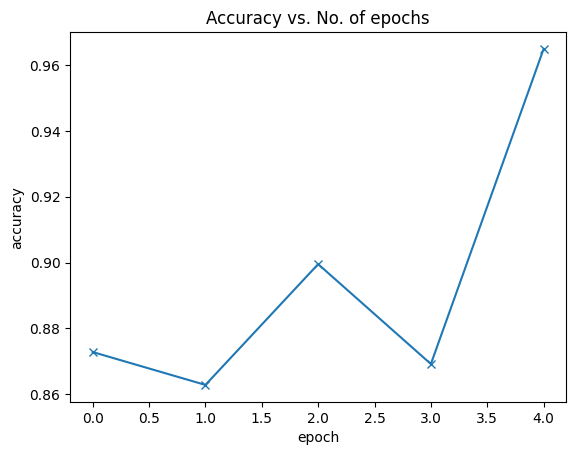

In [35]:
plot_accuracies(history)

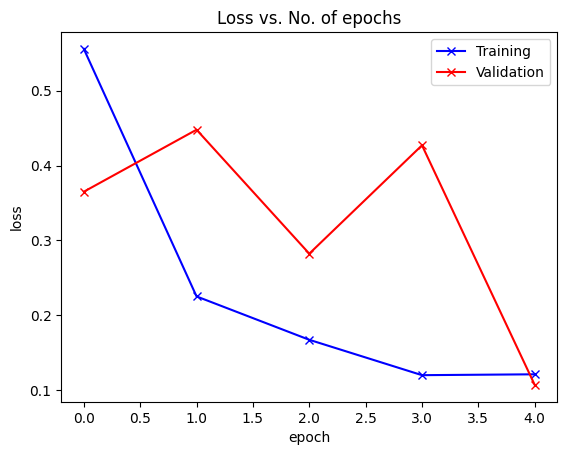

In [36]:
plot_losses(history)

In [37]:
evaluate(model,val_loader)

{'val_loss': 0.10710250586271286, 'val_acc': 0.9649345874786377}

## Evaluation and Prediction on Test Data

In [38]:
x = evaluate(model,test_loader)
x

{'val_loss': 0.10837949812412262, 'val_acc': 0.9666762948036194}

#### **Accuracy of the model on test data : 96.66%**

## Prediction on some single image of test data

In [39]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: Tomato___Bacterial_spot , Predicted: Tomato___Bacterial_spot


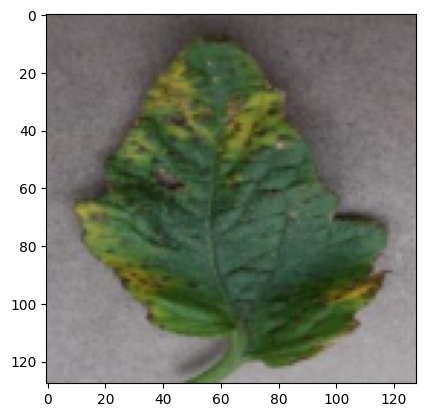

In [40]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Tomato___Late_blight , Predicted: Tomato___Late_blight


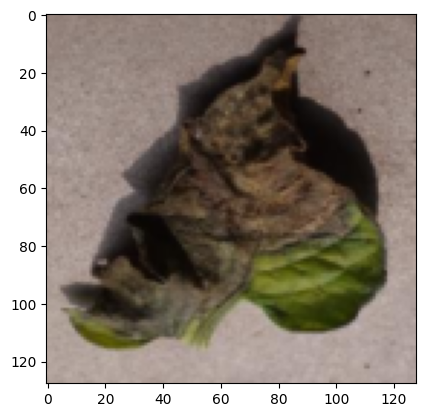

In [41]:
img, label = test_ds[978]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Tomato___Spider_mites Two-spotted_spider_mite , Predicted: Tomato___Spider_mites Two-spotted_spider_mite


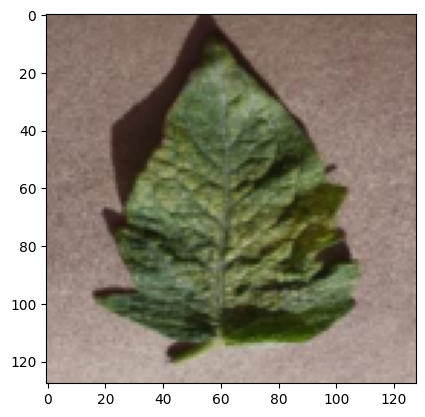

In [42]:
img, label = test_ds[2548]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

## Saving the Model

In [43]:
torch.save(model.state_dict(), 'plantDisease-resnet34.pth')

In [1]:
from tensorflow import keras
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina